In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image
import os
from tqdm import tqdm
import pandas as pd
import keras.backend as K

In [ ]:
def data_gen():
    path='/content/drive/My Drive/siamese_net/photos'
    files=len(os.listdir(path))
    image_data=[]
    data=[]
    for i in tqdm(range(1,files+1)):
        new_path=os.path.join(path,str(i))
        image_names=os.listdir(new_path)
        for j in image_names:
            image_path=os.path.join(new_path,str(j))
            image=Image.open(image_path).resize((300,300))
            image=np.array(image)
            image=image.reshape(300,300,3)
            image_data.append(image)
            image=[]
        data.append(np.array(image_data))
        image_data=[]
    return data

In [ ]:
y = pd.read_csv('/content/drive/My Drive/siamese_net/y.csv')
data=data_gen()

100%|██████████| 2/2 [00:27<00:00, 13.52s/it]


In [ ]:
left_input = tf.keras.Input(shape=(300,300,3), name='left_input')
right_input = tf.keras.Input(shape=(300,300,3), name='right_input')
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),padding='same',input_shape=(300,300,3),activation='relu',kernel_regularizer='l2',name='conv_1'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',kernel_regularizer='l2',name='conv_2'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',kernel_regularizer='l2',name='conv_3'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',kernel_regularizer='l2',name='conv_4'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1600,activation='relu',kernel_regularizer='l2'))
model.add(tf.keras.layers.Dense(400,activation='relu',kernel_regularizer='l2'))
encoding_l=model(left_input)
encoding_r=model(right_input)
x=tf.keras.layers.Subtract()([encoding_l,encoding_r])
x=tf.keras.backend.abs(x)
predictions = tf.keras.layers.Dense(1, activation='sigmoid',name='main_output')(x)
s_model = tf.keras.models.Model(inputs=[left_input, right_input], outputs=predictions)

In [ ]:
s_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
left_input (InputLayer)         [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
right_input (InputLayer)        [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 400)          67238032    left_input[0][0]                 
                                                                 right_input[0][0]                
__________________________________________________________________________________________________
subtract (Subtract)             (None, 400)          0           sequential[0][0]      

In [ ]:
s_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adamax(lr=0.000006),metrics=['accuracy'])

In [ ]:
# import random
# length=np.shape(data[0])
# value=data[0]
# x1=[]
# random=random.sample(range(length[0]),length[0])
# for i in random:
#     x1.append(value[i,:,:,:])
# x1=np.array(x1)
x1=data[0]
x1=x1.reshape(-1,300,300,3)
x2=data[1].reshape(-1,300,300,3)
# print(random)

In [ ]:
print(np.shape(x1))

(10, 300, 300, 3)


In [ ]:
history=s_model.fit([x1,x2],y,epochs=75)

Epoch 1/75
1/1 [==============================] - 0s 8ms/step - loss: 42.2457 - accuracy: 0.3000
Epoch 2/75
1/1 [==============================] - 0s 115ms/step - loss: 39.8193 - accuracy: 1.0000
Epoch 3/75
1/1 [==============================] - 0s 111ms/step - loss: 39.7879 - accuracy: 1.0000
Epoch 4/75
1/1 [==============================] - 0s 111ms/step - loss: 39.7630 - accuracy: 1.0000
Epoch 5/75
1/1 [==============================] - 0s 112ms/step - loss: 39.7387 - accuracy: 1.0000
Epoch 6/75
1/1 [==============================] - 0s 114ms/step - loss: 39.7145 - accuracy: 1.0000
Epoch 7/75
1/1 [==============================] - 0s 117ms/step - loss: 39.6904 - accuracy: 1.0000
Epoch 8/75
1/1 [==============================] - 0s 108ms/step - loss: 39.6664 - accuracy: 1.0000
Epoch 9/75
1/1 [==============================] - 0s 112ms/step - loss: 39.6423 - accuracy: 1.0000
Epoch 10/75
1/1 [==============================] - 0s 110ms/step - loss: 39.6182 - accuracy: 1.0000
Epoch 11/75

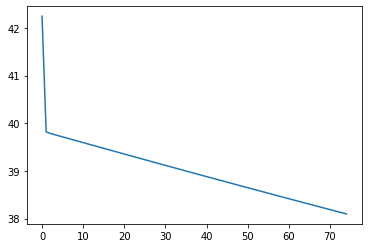

In [ ]:
plt.plot(history.history['loss'])
plt.show()

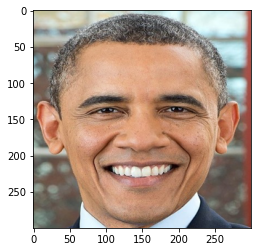

In [ ]:
#anchor image
# anchor_path=r'C:\Users\bisha\Desktop\siamese\anchor\anchor.jpg'
anchor_path=r'/content/drive/My Drive/siamese_net/test/obama_anchor.jpg'
anchor_image=Image.open(anchor_path).resize((300,300))
plt.imshow(anchor_image)
plt.show()
anchor_image=np.array(anchor_image)
anchor_image=anchor_image.reshape(1,300,300,3)
anchor_image=np.array(anchor_image)

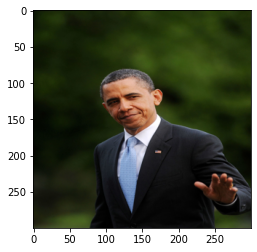

In [ ]:
#test image
test_path=r'/content/drive/My Drive/siamese_net/test/obama_1.jpg'
test_image=Image.open(test_path).resize((300,300))
plt.imshow(test_image)
plt.show()
test_image=np.array(test_image)
test_image=test_image.reshape(1,300,300,3)
test_image=np.array(test_image)

In [ ]:
v=s_model.predict([anchor_image,test_image])
if (v>=0.5):
    print('the person is same with prob: ',v*100)
else:
    print('the person is diff with prob',v*100)

the person is same with prob:  [[97.92278]]


In [ ]:
layer_name = 'conv_3'
intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict([test_image,test_image])


In [ ]:
image=intermediate_output[0]

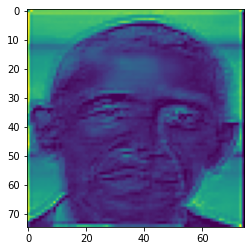

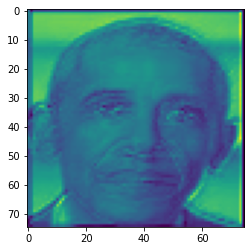

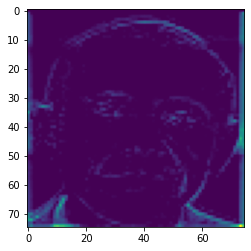

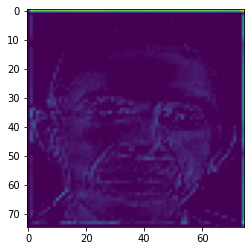

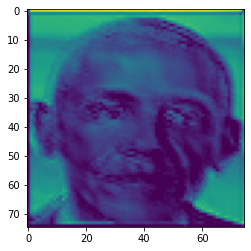

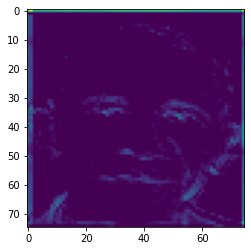

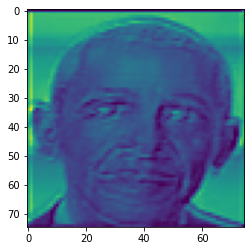

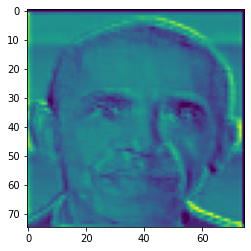

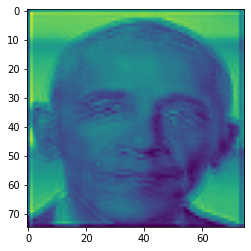

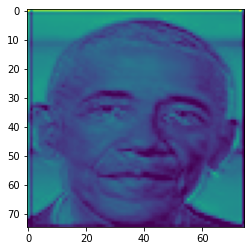

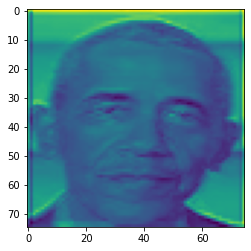

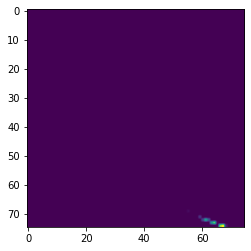

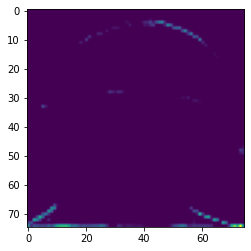

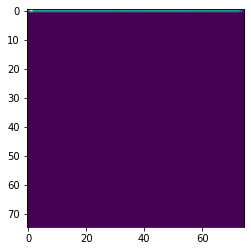

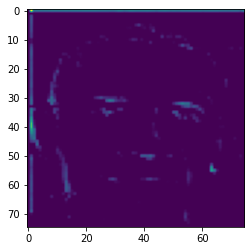

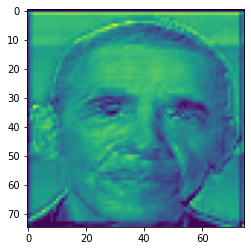

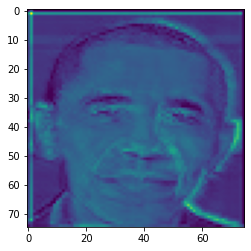

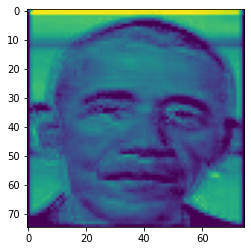

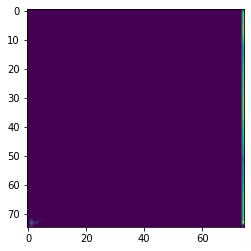

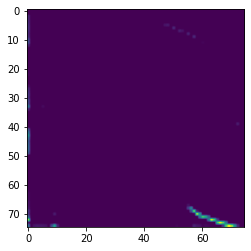

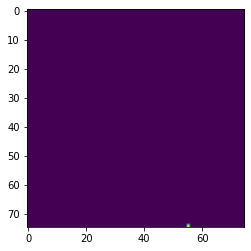

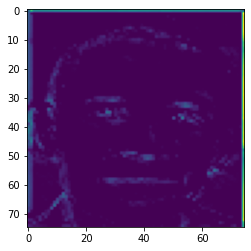

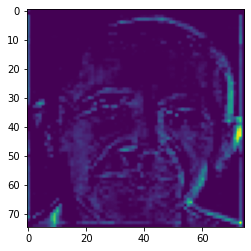

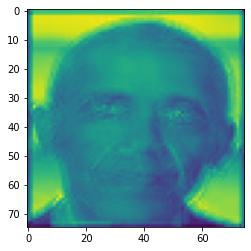

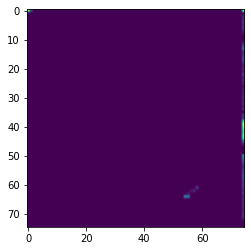

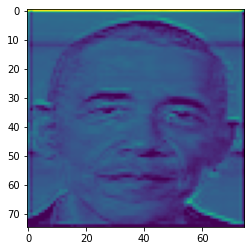

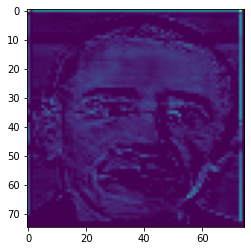

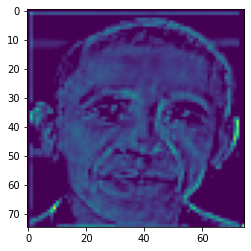

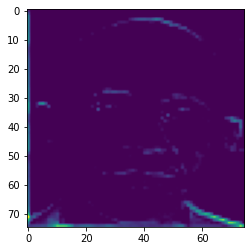

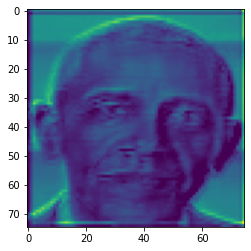

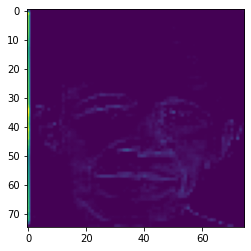

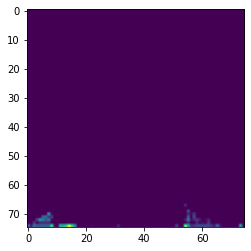

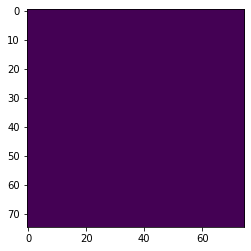

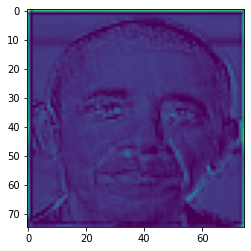

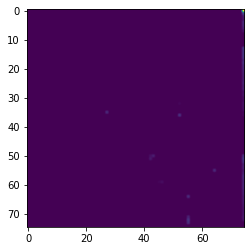

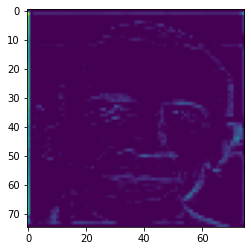

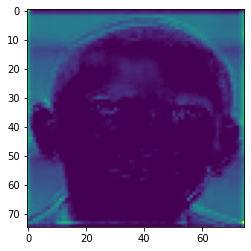

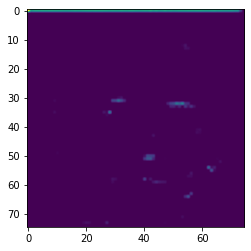

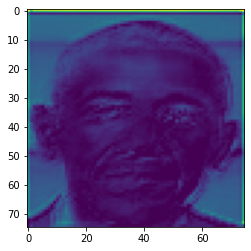

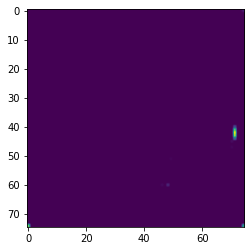

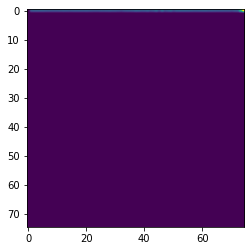

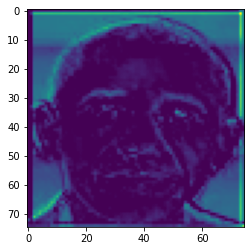

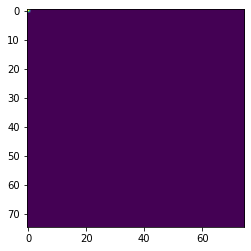

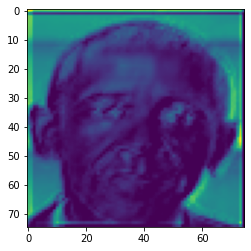

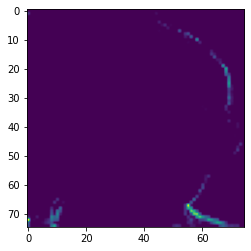

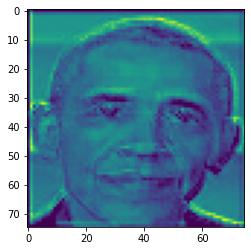

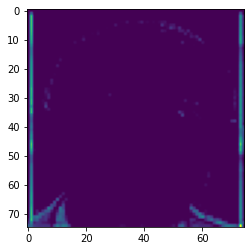

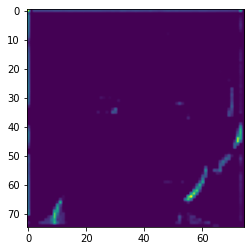

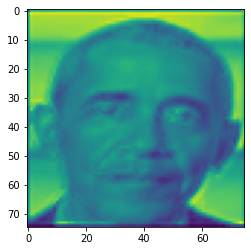

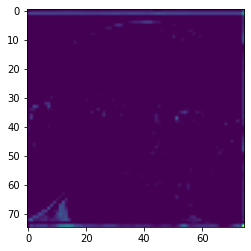

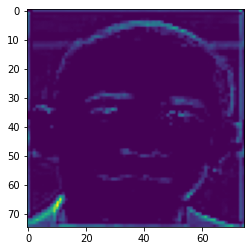

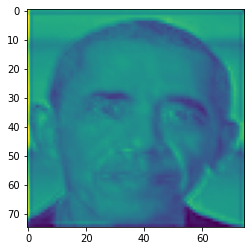

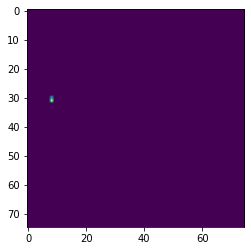

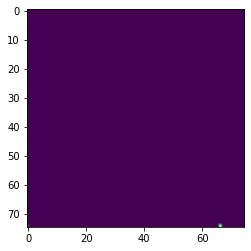

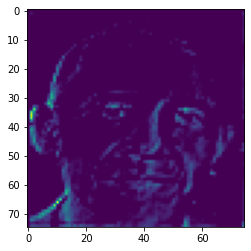

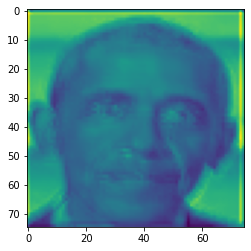

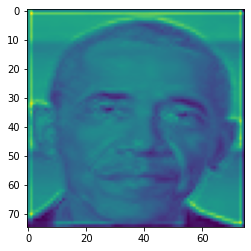

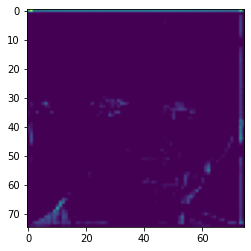

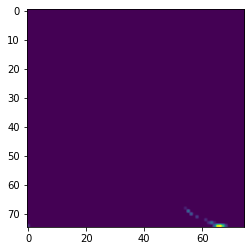

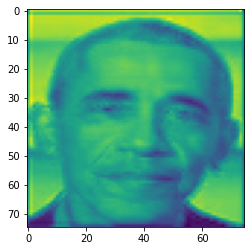

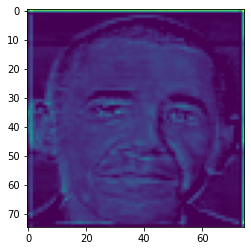

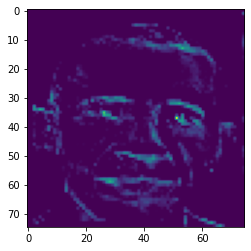

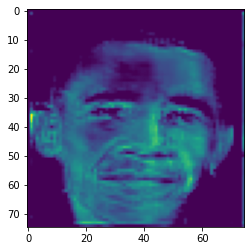

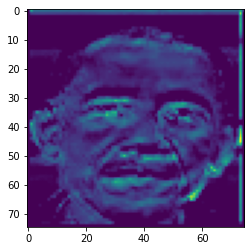

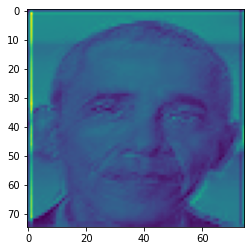

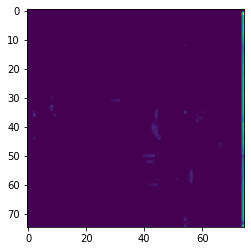

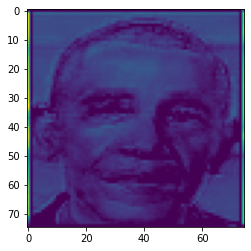

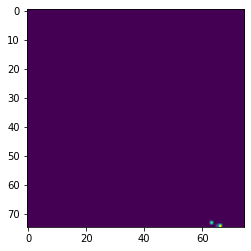

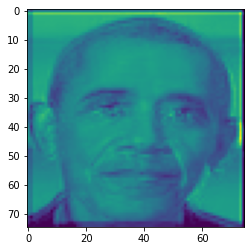

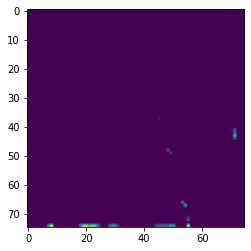

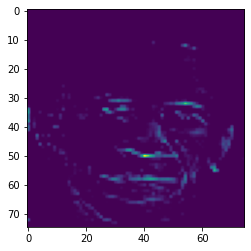

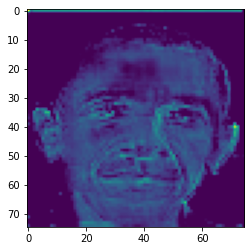

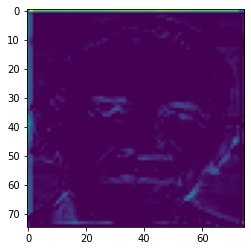

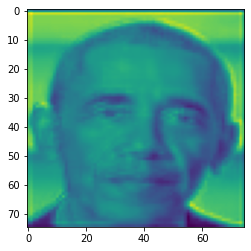

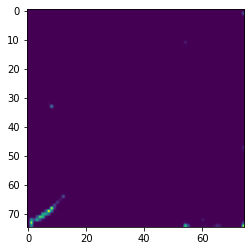

In [ ]:
 for layer in range(1,len(image)+1):
   plt.imshow(image[:,:,layer])
   plt.show()